# Fit to the Star Rating Regression

In [61]:
from utils import * 
import pandas as pd
import plotly.plotly as py
import plotly 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plotly.tools.set_credentials_file(username='kt426', api_key='GcKIXRGajqJ9KlQAcL2L')
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime

In [2]:
DATAPASS = '../../../yelp10/dataset/business.json'
business = load_json_to_df(DATAPASS)

In [4]:
review_chinese = pd.read_csv('chinese_reviews.csv')

In [14]:
review_chinese.groupby('business_id').count().sort_values(by = 'review_id', ascending = False).head()

,cool,date,funny,review_id,stars,text,useful,user_id
business_id,,,,,,,,
yfxDa8RFOvJPQh0rNtakHA,2446,2446,2446,2446,2446,2446,2446,2446
pH0BLkL4cbxKzu471VZnuA,1972,1972,1972,1972,1972,1972,1972,1972
X8c23dur0ll2D9XTu-I8Qg,1548,1548,1548,1548,1548,1548,1548,1548
GJ_bXUPv672YwNg4TneJog,1319,1319,1319,1319,1319,1319,1319,1319
cHdJXLlKNWixBXpDwEGb_A,1262,1262,1262,1262,1262,1262,1262,1262


In [17]:
sample_with_most_reviews = review_chinese.loc[review_chinese['business_id'] == 'yfxDa8RFOvJPQh0rNtakHA']

In [19]:
sample_with_most_reviews.shape

(2446, 9)

In [20]:
sample_with_most_reviews.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
150374,yfxDa8RFOvJPQh0rNtakHA,1,2013-01-08,0,dU1m00qQh5jSTye573WrUg,4,"ah, finally... Vegan Pho!!!! Gotta love it. Y...",1,Fr1AHwaEhj1zryGBR49Z5Q
150375,yfxDa8RFOvJPQh0rNtakHA,0,2014-11-30,0,t-lv3fiR0NLrcRcv2zcIUA,3,Food taste great but for some reason i dont li...,0,OZH8TBAG_V-1Mf2wtD2ofA
150376,yfxDa8RFOvJPQh0rNtakHA,1,2012-03-14,1,Yz1PRmyVM2uf4SbufvdZUQ,4,I was there on a mini vacation and I we had to...,1,jRO5X3FaKQHM3aeBFLo7lQ
150377,yfxDa8RFOvJPQh0rNtakHA,2,2012-01-29,5,KF8eXpbuTWpy1R_oyAtlJw,4,4am.... drunk..... need food......it's cold ou...,3,VzzxTAOi3jFaPlwgkVC5IA
150378,yfxDa8RFOvJPQh0rNtakHA,2,2011-04-04,1,tgA6tCTpNIkz5KYIO_4a-g,4,"It's nice to get off the strip, and this is on...",2,cfal6-bQGmfkZO7Jw6y-6Q


In [25]:
sample_with_most_reviews.groupby('date').count()['review_id'].keys()

Index(['2007-01-03', '2007-01-08', '2007-01-14', '2007-01-25', '2007-01-30',
       '2007-02-12', '2007-03-31', '2007-06-14', '2007-06-25', '2007-07-21',
       ...
       '2017-07-11', '2017-07-12', '2017-07-13', '2017-07-14', '2017-07-15',
       '2017-07-16', '2017-07-19', '2017-07-22', '2017-07-23', '2017-07-25'],
      dtype='object', name='date', length=1615)

In [216]:
x = sample_with_most_reviews.groupby('date').count()['review_id'].values

## Moving average

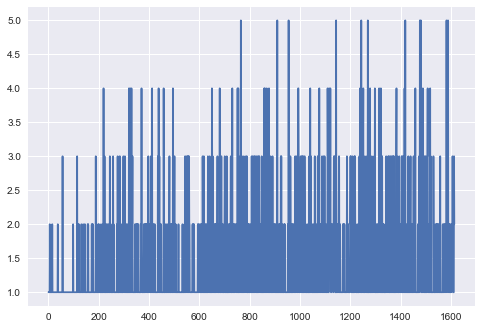

In [218]:
plt.plot(range(len(x)), x)
plt.show()

In [90]:
star = sample_with_most_reviews.sort_values(by = 'date')['stars'].values

In [91]:
date[0]

datetime.datetime(2007, 1, 3, 0, 0)

In [92]:
date = sample_with_most_reviews.sort_values(by = 'date')['date'].values
date = [datetime.strptime(st, "%Y-%m-%d") for st in date]

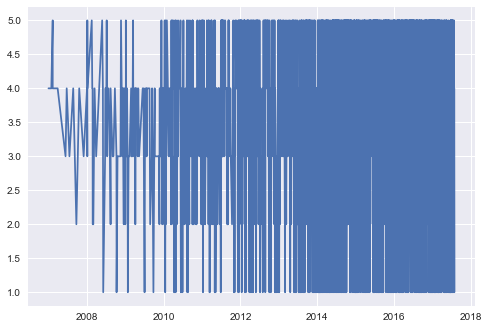

In [93]:
plt.plot(date, star)
plt.show()

In [219]:
result = seasonal_decompose(star, model='additive', freq = 10)

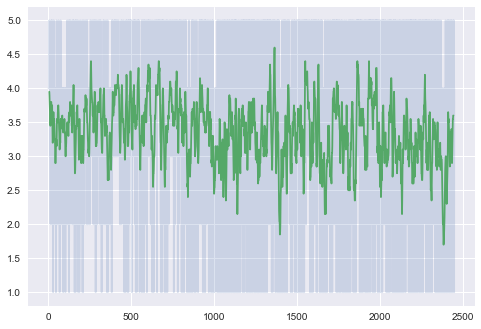

In [220]:
plt.plot(result.observed,alpha = 0.2)
plt.plot(result.trend)
plt.show()

In [221]:
for i in range(5):
    result.trend[i]= result.trend[5]
    result.trend[-i+1] = result.trend[len(result.trend)-6]

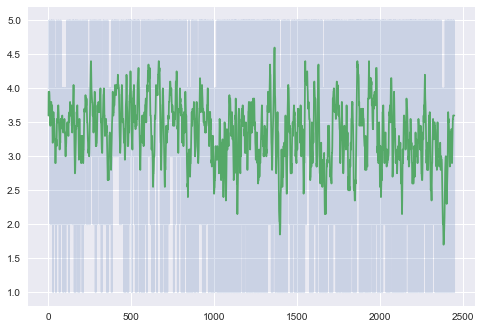

In [222]:
plt.plot(result.observed, alpha = 0.2)
plt.plot(result.trend)
plt.show()

Moving average for the i th event takes the average of i-Interval/2 to i + Interval/2. This trait is not appropriate since we want to predict the next interval based on the previous interval.

## Step Function

In [182]:
from scipy import stats
def create_step_function(array, interval):
    '''
    Generate the step function that calculates the average of values every interval
    
    Input:
        array(list) : dataframe of reviews
        interval(int) : business_id for sample business 1

    output:
        out(list) : The result of step function
    '''
    counter = 0 
    out = []
    out2 = []
    while (counter < len(array) - interval):
        counter += interval
        mu = np.array(array[counter:counter+interval]).mean()
        mode = stats.mode(np.array(array[counter:counter+interval]))
        for i in range(interval):
            out.append(mu)
            out2.append(mode[0][0])
    return out,out2

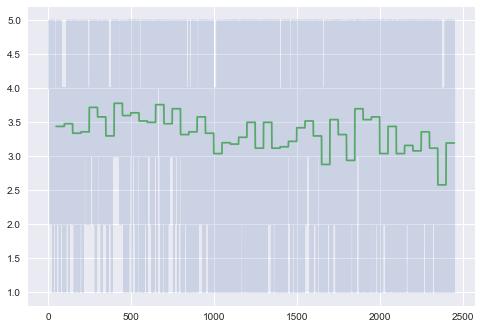

In [204]:
step,step_mode = create_step_function(star, 50)
plt.plot(range(len(star)), star, alpha = 0.2)
plt.plot(range(len(star)-len(step),len(star)), step)
plt.show()

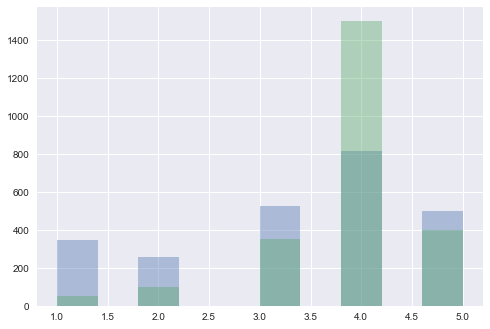

In [205]:
plt.hist(star, alpha = 0.4)
plt.hist(step_mode, alpha = 0.4)
plt.show()

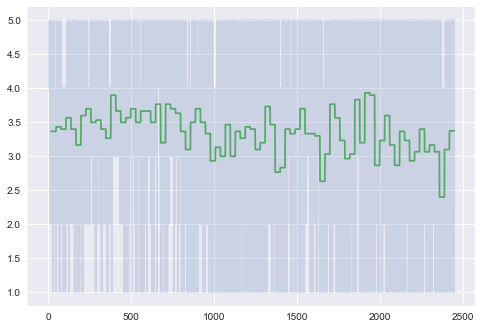

In [206]:
step, mode = create_step_function(star, 30)
plt.plot(range(len(star)), star, alpha = 0.2)
plt.plot(range(len(star)-len(step),len(star)), step)
plt.show()

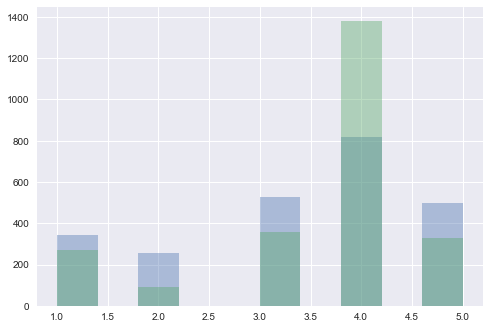

In [207]:
plt.hist(star, alpha = 0.4)
plt.hist(mode, alpha = 0.4)
plt.show()

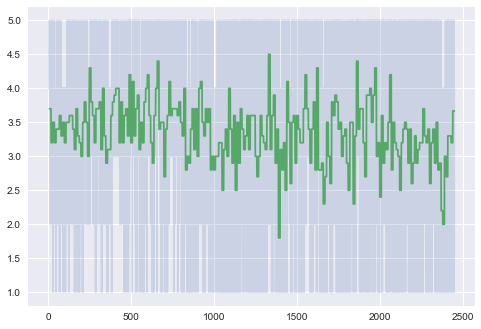

In [208]:
step, mode = create_step_function(star, 10)
plt.plot(range(len(star)), star, alpha = 0.2)
plt.plot(range(len(star)-len(step),len(star)), step)
plt.show()

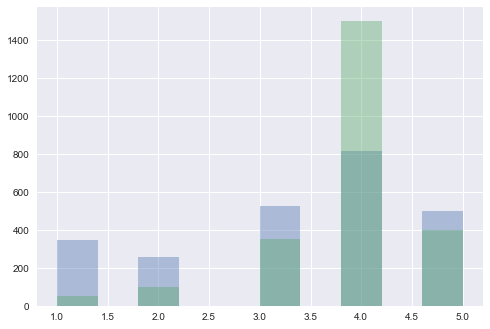

In [209]:
plt.hist(star, alpha = 0.4)
plt.hist(step_mode, alpha = 0.4)
plt.show()

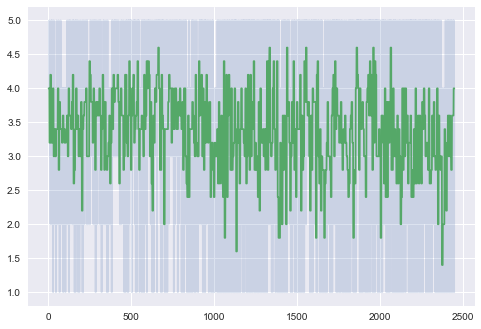

In [210]:
step, mode = create_step_function(star, 5)
plt.plot(range(len(star)), star, alpha = 0.2)
plt.plot(range(len(star)-len(step),len(star)), step)
plt.show()

In [302]:
def create_triangluar_rv(array, interval):
    '''
    Generate the triangular random distribution funtion for every given interval
    
    Input:
        array(list) : dataframe of reviews
        interval(int) : business_id for sample business 1

    output:
        out(list) : The result of step function
    '''
    counter = 0 
    out = []
    while (counter < len(array) - interval):
        counter += interval
        mu = np.array(array[counter:counter+interval])
        mode = stats.mode(np.array(array[counter:counter+interval]))
        for i in range(interval):
            out.append(int(np.random.triangular(min(mu)-1, mode[0][0], max(mu)))+1)
    return out

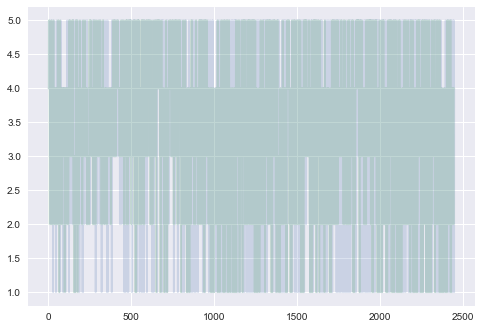

In [303]:
step = create_triangluar_rv(star, 5)
plt.plot(range(len(star)), star, alpha = 0.2)
plt.plot(range(len(star)-len(step),len(star)), step, alpha = 0.2)
plt.show()

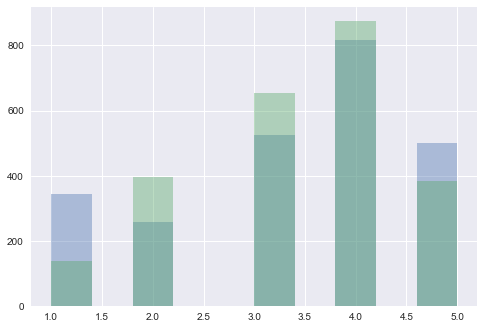

In [304]:
plt.hist(star, alpha = 0.4)
plt.hist(step, alpha = 0.4)
plt.show()

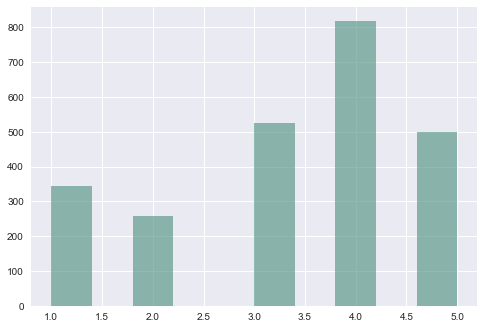

In [312]:
step = create_triangluar_rv(star, 1)
plt.hist(star, alpha = 0.4)
plt.hist(step, alpha = 0.4)
plt.show()

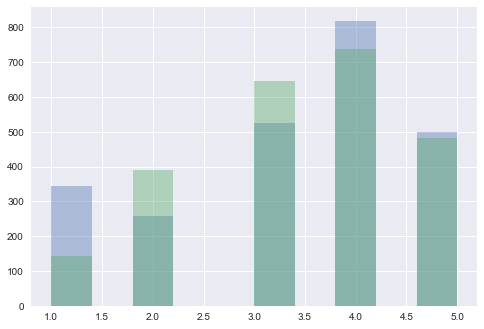

In [309]:
step = create_triangluar_rv(star, 50)
plt.hist(star, alpha = 0.4)
plt.hist(step, alpha = 0.4)
plt.show()

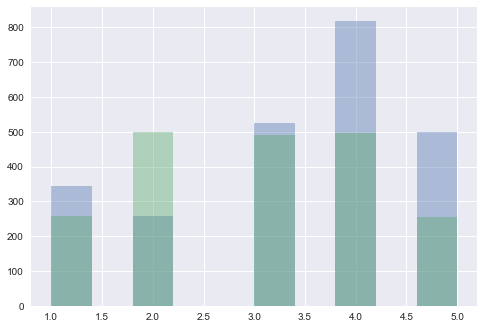

In [311]:
step = create_triangluar_rv(star, 1000)
plt.hist(star, alpha = 0.4)
plt.hist(step, alpha = 0.4)
plt.show()

## Chi Square Goodness of Fit